# Problem Statement

# The notebooks explores the basic use of Pandas and will cover the basic commands of Exploratory Data Analysis(EDA) which includes cleaning, munging, combining, reshaping, slicing, dicing, and transforming data for analysis purpose.
•Exploratory Data Analysis 
 Understand the data by EDA and derive simple models with Pandas as baseline. EDA is a critical and first step in analyzing the data and we do this for below reasons :◾Finding patterns in Data
◾Determining relationships in Data
◾Checking of assumptions
◾Preliminary selection of appropriate models
◾Detection of mistakes 


# Data Loading & Description

Importing Packages

In [3]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output

In [4]:
csv_df=pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/Automobile_data.csv')

# Data Profiling

•In the upcoming sections we will first understand our dataset using various pandas functionalities.

•Then with the help of pandas profiling we will find which columns of our dataset need preprocessing.

•In preprocessing we will deal with erronous and missing values of columns.

•Again we will do pandas profiling to see how preprocessing have transformed our dataset.


# Understanding the Dataset

To gain insights from data we must look into each aspect of it very carefully. We will start with observing few rows and columns of data both from the starting and from the end

In [5]:
csv_df.shape

(205, 26)

csv_df (Automobile data) having 205 rows and 26 column

In [9]:
csv_df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [10]:
csv_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [11]:
csv_df.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [12]:
csv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

In [72]:
csv_df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


Descriptive statistics details

In [14]:
csv_df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

# Pre-Profiling

•By pandas profiling, an interactive HTML report gets generated which contins all the information about the columns of the dataset, like the counts and type of each column. Detailed information about each column, coorelation between different columns and a sample of dataset.

•It gives us visual interpretation of each column in the data.

•Spread of the data can be better understood by the distribution plot.

•Grannular level analysis of each column.


In [16]:
!pip install pandas-profiling --upgrade

Requirement already up-to-date: pandas-profiling in c:\users\abhimnku\appdata\local\continuum\anaconda3\lib\site-packages (2.3.0)


In [23]:
csv_df.corr()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.178515,-0.035823,0.034606
wheel-base,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.249786,-0.470414,-0.544082
length,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.158414,-0.670909,-0.704662
width,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.181129,-0.642704,-0.677218
height,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.261214,-0.048640,-0.107358
curb-weight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.151362,-0.757414,-0.797465
engine-size,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.028971,-0.653658,-0.677470
compression-ratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,1.000000,0.324701,0.265201
city-mpg,-0.035823,-0.470414,-0.670909,-0.642704,-0.048640,-0.757414,-0.653658,0.324701,1.000000,0.971337
highway-mpg,0.034606,-0.544082,-0.704662,-0.677218,-0.107358,-0.797465,-0.677470,0.265201,0.971337,1.000000


Check correlation between variables

In [25]:
pandas_profiling.ProfileReport(csv_df)

In [26]:
profile=pandas_profiling.ProfileReport(csv_df)
profile.to_file(output_file="profiling_before_preprocessing.html")

Observation from Pandas Profiling

Total number of Variables =26

Numeric = 9

Categorical = 16 

No Missing value in dataset Highway mpg is highly Correlated with City mpg Horse power has High cardeniality : 60

distinct values Normalized losses has a high cardianility: 52 distinct values Price has high cardianility : 187

distinct values


# Pre Processing

Dealing with 41 number Question mark symbol in Normalized Lossess data point

In [29]:
csv_df.drop('normalized-losses', axis = 1,inplace = True)

# Post Pandas Profiling

In [30]:
profile=pandas_profiling.ProfileReport(csv_df)
profile.to_file(output_file="profiling_after_preprocessing.html")

Now we have preprocessed the data, now the dataset doesnot contain Question mark symbol & Normalized losses,So the

pandas profiling report which we have generated after preprocessing will give us more beneficial insights. You can

compare the two reports, i.e csv_df_after_preprocessing.html and csv_df_before_preprocessing.html. In 

csv_df__after_preprocessing.html report, observations:

• Number of variables = 24


# Questions

What is the car make which has higher number of sale

Text(0.5, 1.0, 'Bar Chart showing the Number of car against each make')

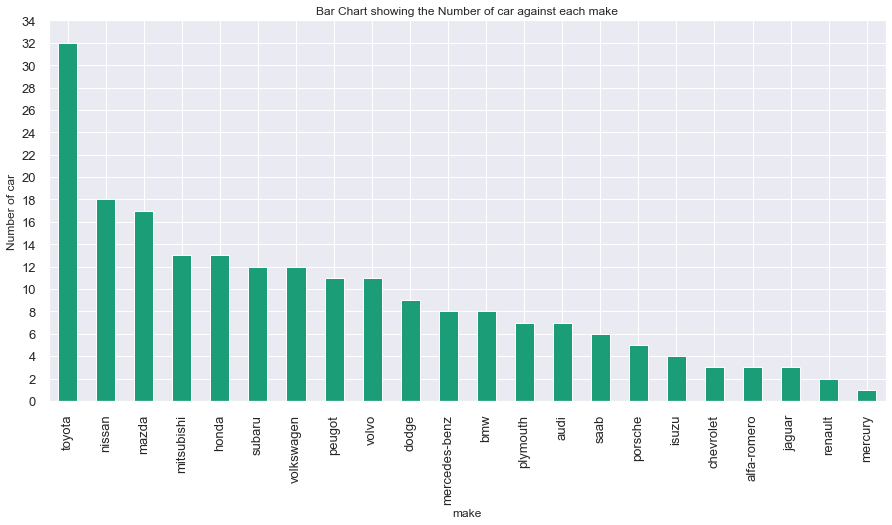

In [34]:
csv_df['make'].value_counts().plot.bar(figsize=(15,7), colormap='Dark2', fontsize=13, yticks=np.arange(0, 36, 2))
plt.xlabel('make')
plt.ylabel('Number of car')
plt.title('Bar Chart showing the Number of car against each make')
plt.title('Bar Chart showing the Number of car against each make')

What is the contribuation of car sales from different body style 

Text(0.5, 1.0, 'Donut Plot showing the proportion of Car body-style')

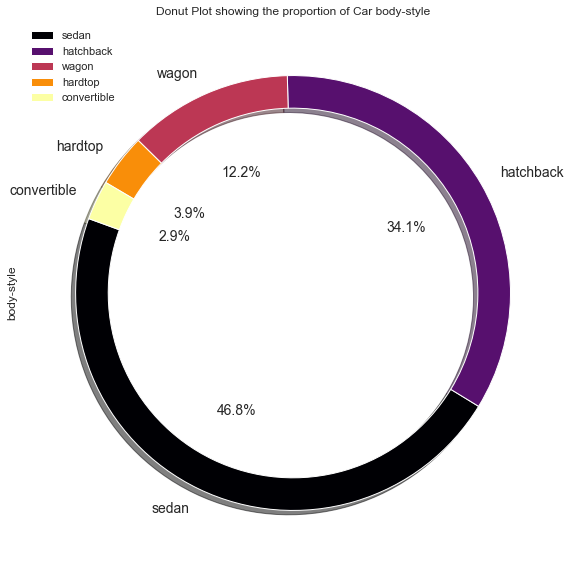

In [41]:
space = np.ones(5)/4
csv_df['body-style'].value_counts().plot(kind='pie',fontsize=14, autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                       shadow=True, startangle=160, figsize=(10,10), cmap='inferno', legend=True)

plt.ylabel('body-style')
plt.title('Donut Plot showing the proportion of Car body-style')

What is the distribution of car sale as per engine type

Text(0.5, 1.0, 'Donut Plot showing the proportion of Car body-style')

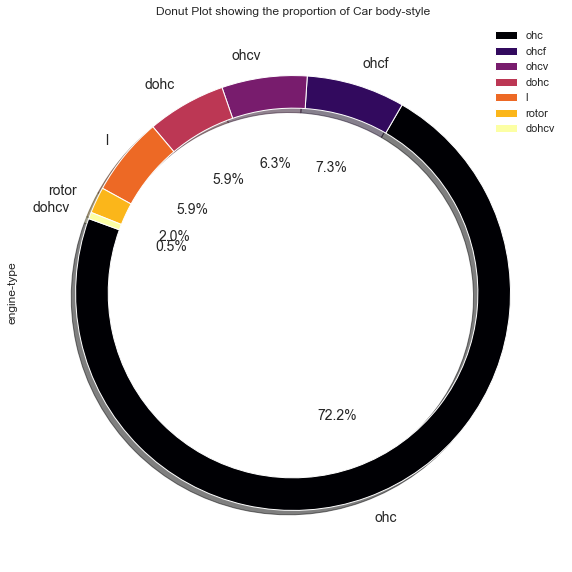

In [43]:
csv_df['engine-type'].value_counts().plot(kind='pie',fontsize=14, autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                       shadow=True, startangle=160, figsize=(10,10), cmap='inferno', legend=True)

plt.ylabel('engine-type')
plt.title('Donut Plot showing the proportion of Car body-style')

Text(0.5, 1.0, 'Donut Plot showing the proportion of Car num-of-cylinders')

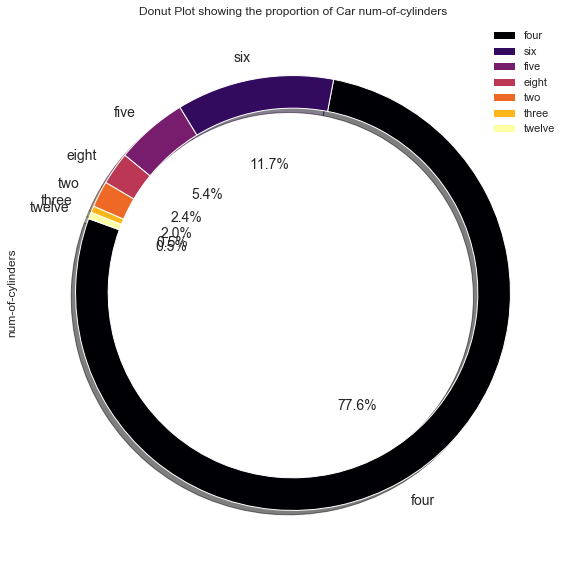

In [60]:
space = np.ones(7)/6
csv_df['num-of-cylinders'].value_counts().plot(kind='pie',fontsize=14, autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                       shadow=True, startangle=160, figsize=(10,10), cmap='inferno', legend=True)

plt.ylabel('num-of-cylinders')
plt.title('Donut Plot showing the proportion of Car num-of-cylinders')

In [75]:
csv_df.groupby(['body-style'])['body-style'].count()

body-style
convertible     6
hardtop         8
hatchback      70
sedan          96
wagon          25
Name: body-style, dtype: int64

Get diferent body style car sales number

In [47]:
csv_df.groupby(['make'])['make'].count()

make
alfa-romero       3
audi              7
bmw               8
chevrolet         3
dodge             9
honda            13
isuzu             4
jaguar            3
mazda            17
mercedes-benz     8
mercury           1
mitsubishi       13
nissan           18
peugot           11
plymouth          7
porsche           5
renault           2
saab              6
subaru           12
toyota           32
volkswagen       12
volvo            11
Name: make, dtype: int64

Get different make car sales number

In [48]:
csv_df.groupby(['engine-type'])['engine-type'].count()

engine-type
dohc      12
dohcv      1
l         12
ohc      148
ohcf      15
ohcv      13
rotor      4
Name: engine-type, dtype: int64

Get different car sales number as per engine type

In [49]:
csv_df.groupby(['fuel-type'])['fuel-type'].count()

fuel-type
diesel     20
gas       185
Name: fuel-type, dtype: int64

Get car sales number as per fuel type

In [50]:
csv_df.groupby(['horsepower'])['horsepower'].count()

horsepower
100     2
101     6
102     5
106     1
110     8
111     4
112     2
114     6
115     1
116     9
120     1
121     3
123     4
134     1
135     1
140     1
142     1
143     1
145     5
152     3
154     1
155     2
156     2
160     6
161     2
162     2
175     1
176     2
182     3
184     2
200     1
207     3
262     1
288     1
48      1
52      2
55      1
56      2
58      1
60      1
62      6
64      1
68     19
69     10
70     11
72      1
73      3
76      5
78      1
82      5
84      5
85      3
86      4
88      6
90      3
92      4
94      2
95      7
97      5
?       2
Name: horsepower, dtype: int64

In [52]:
csv_df.groupby(['num-of-cylinders'])['num-of-cylinders'].count()

num-of-cylinders
eight       5
five       11
four      159
six        24
three       1
twelve      1
two         4
Name: num-of-cylinders, dtype: int64

Get Car sales number as per number of cylinders

In [53]:
csv_df.groupby(['stroke'])['stroke'].count()

stroke
2.07     1
2.19     2
2.36     1
2.64    11
2.68     2
2.76     1
2.8      2
2.87     1
2.9      3
3.03    14
3.07     6
3.08     2
3.1      2
3.11     6
3.12     1
3.15    14
3.16     1
3.19     6
3.21     1
3.23    14
3.27     6
3.29     9
3.35     9
3.39    13
3.4     20
3.41     6
3.46     8
3.47     4
3.5      6
3.52     5
3.54     4
3.58     6
3.64     5
3.86     4
3.9      3
4.17     2
?        4
Name: stroke, dtype: int64

In [54]:
csv_df.groupby(['num-of-doors'])['num-of-doors'].count()

num-of-doors
?         2
four    114
two      89
Name: num-of-doors, dtype: int64

In [55]:
csv_df.groupby(['peak-rpm'])['peak-rpm'].count()

peak-rpm
4150     5
4200     5
4250     3
4350     4
4400     3
4500     7
4650     1
4750     4
4800    36
4900     1
5000    27
5100     3
5200    23
5250     7
5300     1
5400    13
5500    37
5600     1
5750     1
5800     7
5900     3
6000     9
6600     2
?        2
Name: peak-rpm, dtype: int64

In [56]:
csv_df.groupby(['aspiration'])['aspiration'].count()

aspiration
std      168
turbo     37
Name: aspiration, dtype: int64

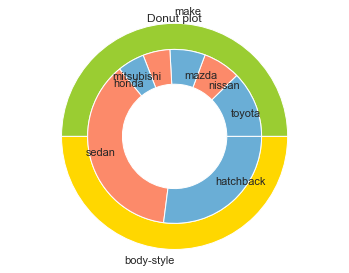

In [59]:
import matplotlib.pyplot as plt
 
    
group_names=['make', 'body-style']
group_size=[205,205]
subgroup_names=['toyota','nissan','mazda','mitsubishi','honda','sedan','hatchback']
subgroup_size=[32,18,17,13,13,96,70]
 

a, b, c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors = ['yellowgreen', 'gold'])
plt.setp( mypie, width=0.3, edgecolor='white')


 

mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=[a(0.5), b(0.4), a(0.5), b(0.4)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
plt.title('Donut plot')
plt.show()

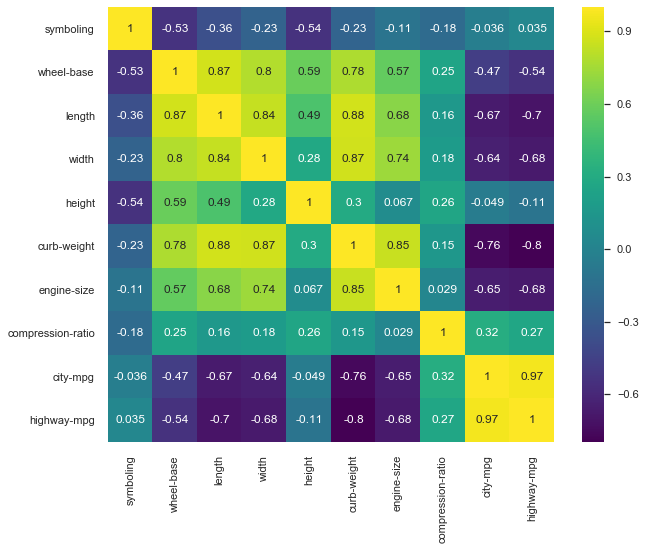

In [61]:
corr_mat = csv_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_mat, annot=True, cmap='viridis')

# Conclusion

•With the help of this notebook we learnt how exploratory data analysis can be carried out using Pandas plotting.

•Also we have seen making use of packages like matplotlib and seaborn to develop better insights about the data.

•We have also seen how preproceesing helps in dealing with irregualities present in the data.

•We also make use of pandas profiling feature to generate an html report containing all the information of the various features present in the dataset.
